<a href="https://colab.research.google.com/github/Ashutosh-C605/C_codes-templates/blob/main/Explo-model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving final_data.csv to final_data (1).csv


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers



In [2]:
# Load the dataset
df = pd.read_csv("/content/final_data.csv")

features = ['fs', 'L', 'C']
outputs = ['eff', 'vripple', 'iripple']

# Train/test split
train_df = df.iloc[:1000]
test_df = df.iloc[1000:]

X_train = train_df[features]
y_train = train_df[outputs]
X_test = test_df[features]
y_test = test_df[outputs]


In [3]:
# Scale inputs
input_scaler = StandardScaler()
X_train_scaled = input_scaler.fit_transform(X_train)
X_test_scaled = input_scaler.transform(X_test)

# Scale outputs
output_scaler = StandardScaler()
y_train_scaled = output_scaler.fit_transform(y_train)


In [4]:
from tensorflow.keras.optimizers.schedules import ExponentialDecay

# Learning rate schedule
lr_schedule = ExponentialDecay(
    initial_learning_rate=0.01,
    decay_steps=50,
    decay_rate=0.95,
    staircase=True
)

# Model with L2 regularization
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],),
          kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.2),
    Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.2),
    Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    Dense(3)  # Output layer for eff, vripple, iripple
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
              loss='mse', metrics=['mae'])

early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Train
history = model.fit(
    X_train_scaled, y_train_scaled,
    epochs=300,
    batch_size=32,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=1
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/300
29/29 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.7377 - mae: 0.4812 - val_loss: 0.7378 - val_mae: 0.3033
Epoch 2/300
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4652 - mae: 0.3130 - val_loss: 0.5694 - val_mae: 0.2471
Epoch 3/300
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4182 - mae: 0.2739 - val_loss: 0.3494 - val_mae: 0.2017
Epoch 4/300
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2933 - mae: 0.2292 - val_loss: 0.2079 - val_mae: 0.1763
Epoch 5/300
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2374 - mae: 0.2090 - val_loss: 0.1959 - val_mae: 0.1583
Epoch 6/300
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2539 - mae: 0.1979 - val_loss: 0.1613 - val_mae: 0.1456
Epoch 7/300
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1552 - mae: 0.1561 - val_loss: 0.1277 - val_mae: 0.1221
Epoch 8/300
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2137 - mae: 0.1889 - val_loss: 0.1357 - val_mae: 0.1357
Epoch 9/300
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.22

In [5]:
# Predict on test set
y_pred_scaled = model.predict(X_test_scaled)
y_pred = output_scaler.inverse_transform(y_pred_scaled)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Test Mean Squared Error:", mse)
print("Test R^2 Score:", r2)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Test Mean Squared Error: 0.7209773659706116
Test R^2 Score: 0.9620205760002136


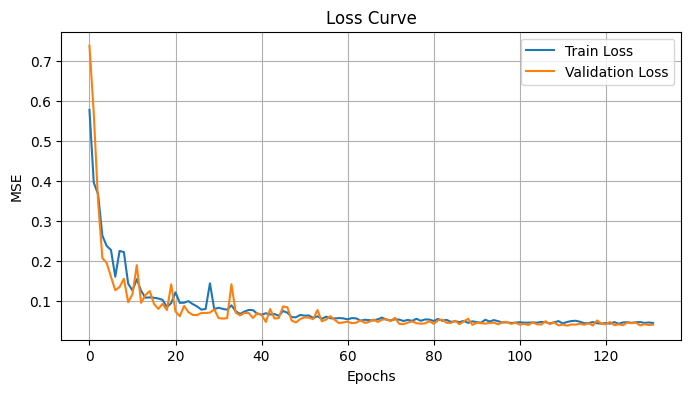

In [6]:
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.grid(True)
plt.legend()
plt.show()

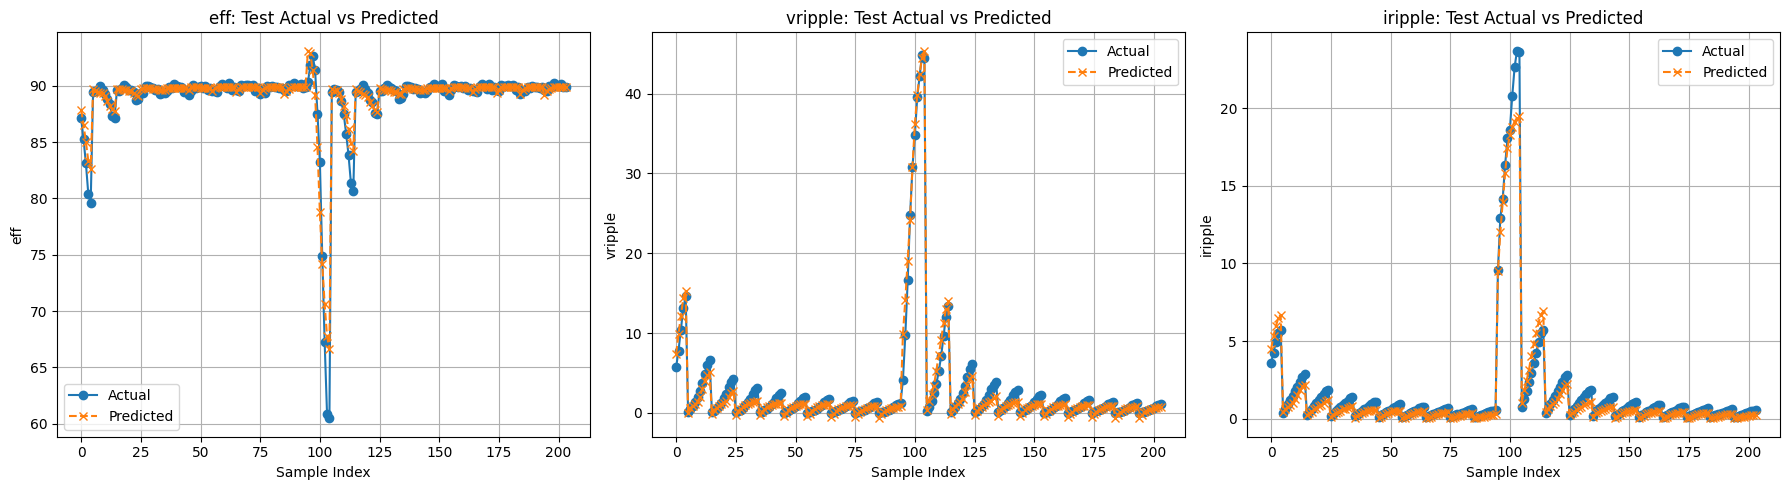

In [7]:
plt.figure(figsize=(18, 5))
for i, output in enumerate(outputs):
    plt.subplot(1, 3, i+1)
    plt.plot(y_test[output].values, label='Actual', linestyle='-', marker='o')
    plt.plot(y_pred[:, i], label='Predicted', linestyle='--', marker='x')
    plt.title(f'{output}: Test Actual vs Predicted')
    plt.xlabel('Sample Index')
    plt.ylabel(output)
    plt.legend()
    plt.grid(True)
plt.tight_layout()
plt.show()


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


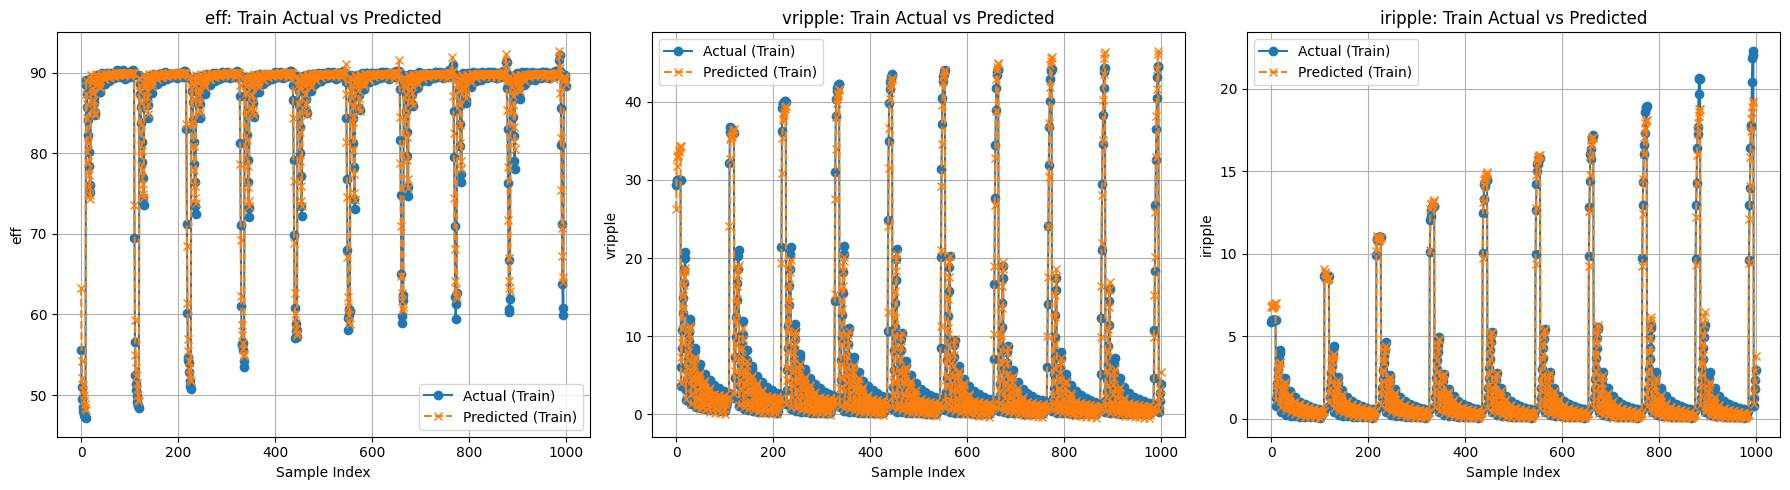

In [8]:
y_train_pred_scaled = model.predict(X_train_scaled)
y_train_pred = output_scaler.inverse_transform(y_train_pred_scaled)

plt.figure(figsize=(18, 5))
for i, output in enumerate(outputs):
    plt.subplot(1, 3, i+1)
    plt.plot(y_train[output].values, label='Actual (Train)', linestyle='-', marker='o')
    plt.plot(y_train_pred[:, i], label='Predicted (Train)', linestyle='--', marker='x')
    plt.title(f'{output}: Train Actual vs Predicted')
    plt.xlabel('Sample Index')
    plt.ylabel(output)
    plt.legend()
    plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
!pip install pyswarm


In [10]:
import numpy as np
from pyswarm import pso

# Bounds
BOUNDS = {
    'fs': (1e4, 1e5),
    'L': (1e-6, 1.5e-3),
    'C': (5e-8, 5e-6)
}

MAX_VRIPPLE = 5.0
MAX_IRIPPLE = 1.0

def objective(x):
    fs, L, C = x
    X_input = pd.DataFrame([[fs, L, C]], columns=['fs', 'L', 'C'])
    X_scaled = input_scaler.transform(X_input)
    pred_scaled = model.predict(X_scaled)
    eff, vripple, iripple = output_scaler.inverse_transform(pred_scaled)[0]

    penalty = 0
    if vripple > MAX_VRIPPLE:
        penalty += (vripple - MAX_VRIPPLE) ** 2
    if iripple > MAX_IRIPPLE:
        penalty += (iripple - MAX_IRIPPLE) ** 2

    return -eff + penalty + 0.1 * (vripple + iripple)



In [11]:
# Define bounds for PSO
lb = [BOUNDS['fs'][0], BOUNDS['L'][0], BOUNDS['C'][0]]
ub = [BOUNDS['fs'][1], BOUNDS['L'][1], BOUNDS['C'][1]]

# Run PSO
best_input, best_score = pso(objective, lb, ub, swarmsize=20, maxiter=30, debug=True)


No constraints given.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [12]:
X_input = np.array([best_input])
X_scaled = input_scaler.transform(X_input)
y_pred_scaled = model.predict(X_scaled)
eff, vripple, iripple = output_scaler.inverse_transform(y_pred_scaled)[0]

print("\n🎯 Best Input Found:")
print(f"fs = {best_input[0]:.2f}")
print(f"L  = {best_input[1]:.6e}")
print(f"C  = {best_input[2]:.6e}")

print("\n📈 Predicted Outputs:")
print(f"eff      = {eff:.4f}")
print(f"vripple  = {vripple:.4f}")
print(f"iripple  = {iripple:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



🎯 Best Input Found:
fs = 42867.89
L  = 1.216958e-03
C  = 1.607667e-06

📈 Predicted Outputs:
eff      = 89.9172
vripple  = 0.2965
iripple  = 0.0993
